In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("C:\\Users\\FOLIO\\Desktop\\eekeda/Admission_Predict_Ver1.1.csv")

In [3]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [4]:
data.sample(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
459,460,329,113,4,4.0,3.5,9.36,1,0.89
26,27,322,109,5,4.5,3.5,8.80,0,0.76
381,382,319,105,3,3.0,3.5,8.67,1,0.73
412,413,314,102,4,2.5,2.0,7.88,1,0.59
278,279,308,103,2,3.0,3.5,8.49,0,0.66


In [5]:
data.shape

(500, 9)

In [6]:
#checking the null values
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [8]:
data.duplicated().sum()

0

In [9]:
data.drop(columns=['Serial No.'],inplace=True)

In [10]:
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [11]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [12]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [13]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 1)

In [26]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
238,310,104,3,2.0,3.5,8.37,0
438,318,110,1,2.5,3.5,8.54,1
475,300,101,3,3.5,2.5,7.88,0
58,300,99,1,3.0,2.0,6.80,1
380,322,104,3,3.5,4.0,8.84,1
...,...,...,...,...,...,...,...
255,307,110,4,4.0,4.5,8.37,0
72,321,111,5,5.0,5.0,9.45,1
396,325,107,3,3.0,3.5,9.11,1
235,326,111,5,4.5,4.0,9.23,1


In [27]:
x_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
304,313,106,2,2.5,2.0,8.43,0
340,312,107,3,3.0,3.0,8.46,1
47,339,119,5,4.5,4.0,9.70,0
67,316,107,2,3.5,3.5,8.64,1
479,325,110,4,4.5,4.0,8.96,1
...,...,...,...,...,...,...,...
11,327,111,4,4.0,4.5,9.00,1
192,322,114,5,4.5,4.0,8.94,1
92,298,98,2,4.0,3.0,8.03,0
221,316,110,3,3.5,4.0,8.56,0


In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [29]:
x_train_scaled

array([[0.4       , 0.42857143, 0.5       , ..., 0.57142857, 0.50320513,
        0.        ],
       [0.56      , 0.64285714, 0.        , ..., 0.57142857, 0.55769231,
        1.        ],
       [0.2       , 0.32142857, 0.5       , ..., 0.28571429, 0.34615385,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.74038462,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.77884615,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.32051282,
        0.        ]])

In [19]:
import sys 
print(sys.path)

['C:\\Users\\FOLIO', 'C:\\ProgramData\\Anaconda3\\python39.zip', 'C:\\ProgramData\\Anaconda3\\DLLs', 'C:\\ProgramData\\Anaconda3\\lib', 'C:\\ProgramData\\Anaconda3', '', 'C:\\Users\\FOLIO\\AppData\\Roaming\\Python\\Python39\\site-packages', 'C:\\ProgramData\\Anaconda3\\lib\\site-packages', 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32', 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\FOLIO\\.ipython']


In [30]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [31]:
model = keras.Sequential()  # This line tell that we are preparing Neural Network

model.add(Dense(7, input_dim = 7, activation = 'relu'))  # Dense = layer , Here we add two layers 1st input layer = 7 and one 
                                                         # hidden layer which contain 7 neuron
    
model.add(Dense(1, activation = 'linear'))          # Since it is a regression problem we use activation= relu in hidden layer 
                                                    # and linear in output layer

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 7)                 56        
                                                                 
 dense_3 (Dense)             (None, 1)                 8         
                                                                 
Total params: 64 (256.00 Byte)
Trainable params: 64 (256.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
model.compile(loss = 'mean_absolute_error', optimizer = 'adam')


In [34]:
history = model.fit(x_train_scaled, y_train, epochs = 10, validation_split = 0.2)

Epoch 1/10
10/10 [==============================] - 1s 26ms/step - loss: 0.7704 - val_loss: 0.7837
Epoch 2/10
10/10 [==============================] - 0s 9ms/step - loss: 0.7383 - val_loss: 0.7564
Epoch 3/10
10/10 [==============================] - 0s 7ms/step - loss: 0.7122 - val_loss: 0.7337
Epoch 4/10
10/10 [==============================] - 0s 7ms/step - loss: 0.6880 - val_loss: 0.7115
Epoch 5/10
10/10 [==============================] - 0s 8ms/step - loss: 0.6631 - val_loss: 0.6872
Epoch 6/10
10/10 [==============================] - 0s 8ms/step - loss: 0.6378 - val_loss: 0.6607
Epoch 7/10
10/10 [==============================] - 0s 9ms/step - loss: 0.6116 - val_loss: 0.6341
Epoch 8/10
10/10 [==============================] - 0s 7ms/step - loss: 0.5857 - val_loss: 0.6053
Epoch 9/10
10/10 [==============================] - 0s 8ms/step - loss: 0.5532 - val_loss: 0.5659
Epoch 10/10
10/10 [==============================] - 0s 8ms/step - loss: 0.5054 - val_loss: 0.5062


In [35]:
y_pred = model.predict(x_test_scaled)

4/4 [==============================] - 0s 2ms/step


In [36]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

-13.037708396647531

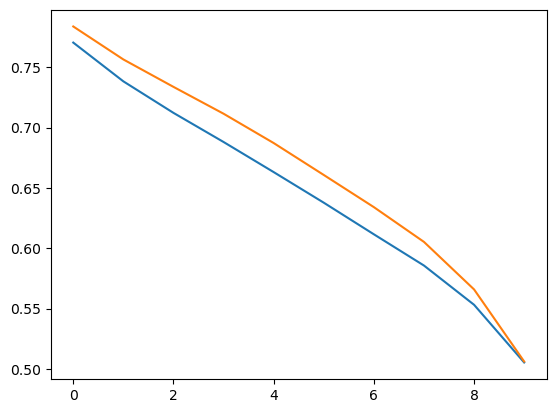

In [38]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [39]:
history1 = model.fit(x_train_scaled, y_train, epochs = 100, validation_split = 0.2)

Epoch 1/100
10/10 [==============================] - 0s 13ms/step - loss: 0.4405 - val_loss: 0.4323
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 0.3680 - val_loss: 0.3534
Epoch 3/100
10/10 [==============================] - 0s 9ms/step - loss: 0.2948 - val_loss: 0.2748
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 0.2264 - val_loss: 0.2104
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 0.1752 - val_loss: 0.1607
Epoch 6/100
10/10 [==============================] - 0s 7ms/step - loss: 0.1308 - val_loss: 0.1131
Epoch 7/100
10/10 [==============================] - 0s 8ms/step - loss: 0.1012 - val_loss: 0.0878
Epoch 8/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0950 - val_loss: 0.0845
Epoch 9/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0889 - val_loss: 0.0831
Epoch 10/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0835 - val_loss: 0.0792
Epoch 11

Epoch 83/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0448 - val_loss: 0.0434
Epoch 84/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0449 - val_loss: 0.0426
Epoch 85/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0449 - val_loss: 0.0425
Epoch 86/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0446 - val_loss: 0.0427
Epoch 87/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0445 - val_loss: 0.0426
Epoch 88/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0450 - val_loss: 0.0424
Epoch 89/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0448 - val_loss: 0.0423
Epoch 90/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0444 - val_loss: 0.0431
Epoch 91/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0442 - val_loss: 0.0423
Epoch 92/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0440 - val_loss: 0.0427


In [40]:
y_pred1 = model.predict(x_test_scaled)

4/4 [==============================] - 0s 839us/step


In [41]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred1)

0.7904849449885593

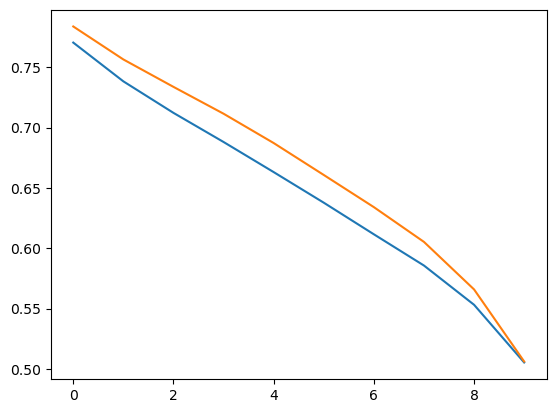

In [42]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])